----------------------------------

# Visão Geral

- Leitura: 30 min
- Exercícios: 15 min 

### Requisitos:
- Conhecidos básicos da linguagem Python

### Conteúdo:
1. Suavização de imagens digitais
---------------------------

### 1. Suavização de imagens digitais

A suavização (do inglês *Smoothing*) ou desfocamento (do inglês *Blurring*) de imagens é o processo de transição de cores de um lado de uma borda da imagem para outro de forma suave, produzindo um efeito "embaçado" ou "borrão" na imagem. 

Este efeito por de ser aplicado propositalmente para remover pixels "indesejados" que podem causar ruídos na imagem, além de melhorar os resultados dos algoritmos de detecção de bordas.

Geralmente, este efeito é obtido aplicando filtros lineares ou não lineres na imagem. A aplicação desses filtros é feito por meio do processo de convolução. 

A convolução consiste em percorrer todos os pixels de uma imagem com uma máscara (3x3, 5x5, etc) realizando um determinado cálculo matemático a ser aplicado no pixel central da máscara. Este processo pode ser observado na animação abaixo.

![Alt Text](../figures/blur-demo.gif)




#### 1.1 Suavização por cálculo da média

Este filtro consiste em calcular a média simples ou ponderada das intensidades dos pixels presentes na máscara, atribuindo o valor da média ao pixel central. 

A fórmula para aplicação do filtro da média simples pode ser observado na figura abaixo. Observe que os pesos para os pixels presentes na máscara 3x3 possuem o mesmo peso, na média ponderada estes valores são distintos e alterados conforme a necessidade da aplicação.

![Alt Text](../figures/kernel.png)

Exemplo de aplicação do filtro da média simples com uma máscara 3x3:

|100  |100 |100 |
|---|:---:|---|
|**200**| **200** |**200**|
|**100**|**100**|**100**|

(100 \* 1 + 100 \* 1 + 100 \* 1 + 200 \* 1 + 200 \* 1 + 200 * \1 + 100 \* 1 + 100 \* 1 + 100 \* 1) / 9 = 133

K=133

Resultado após o processo de convolução com cálculo da média:

|100  |100 |100 |
|---|:---:|---|
|**200**| **133** |**200**|
|**100**|**100**|**100**|

A biblioteca OpenCV disponibiliza a função *blur* para calcular a suavização pelo filtro da média.

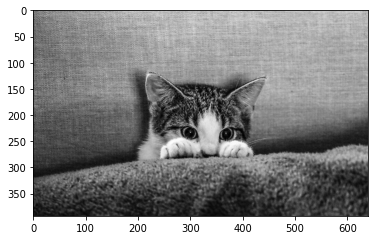

In [1]:
### importação da biblioteca opencv e matplotlib
import cv2
import matplotlib.pyplot as plt

# abrindo a imagem
imagem = cv2.imread('../figures/gato.jpg')
# converte imagem para tons de cinza (gray)
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)

# mostrando a imagem em tons de cinza
plt.imshow(imagem, cmap="gray")

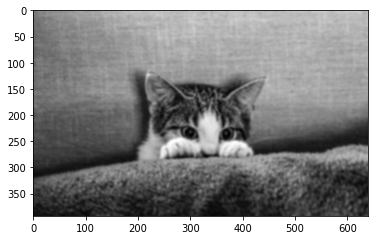

In [5]:
# aplicando a suavização da imagem com uma mascara 5x5
imagem_suavizada = cv2.blur(imagem, (5,5))

# mostrando imagem suavizada
plt.imshow(imagem_suavizada, cmap="gray")

#### 1.2 Suavização pela Gaussiana

Neste filtro, em vez de usar uma máscara com pesos iguais, é usado um *kernel* Gaussiano. Este filtro é altamente eficaz na remoção de ruídos gausianos da imagem.

A biblioteca OpenCV disponibiliza a função *GaussianBlur* para realizar suavização pela Gaussiana.

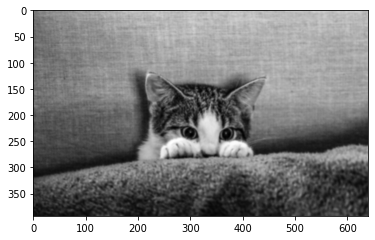

In [6]:
# aplicando a suavização da imagem com uma mascara 5x5
imagem_suavizada_gaussiana = cv2.GaussianBlur(imagem, (5,5), 0)

# mostrando imagem suavizada
plt.imshow(imagem_suavizada_gaussiana, cmap="gray")

#### 1.3 Suavização pela mediana

Esta suavização é realizado pelo filtro da mediana que consiste em calcular a mediana de todos os pixels presentes na máscara, substituíndo o valor do pixel central pelo valor mediano.

Esta sauavização é altamente eficaz na remoção de ruídos de sal e pimenta. 

A biblioteca OpenCV disponibiliza a função *medianBlur* para realizar está suavização.


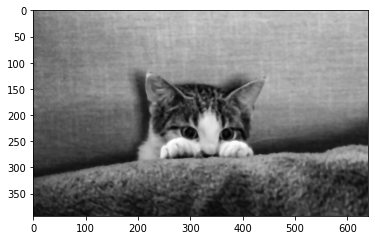

In [8]:
# aplicando a suavização da imagem com uma mascara 5x5
imagem_suavizada_mediana = cv2.medianBlur(imagem, 5)

# mostrando imagem suavizada
plt.imshow(imagem_suavizada_mediana, cmap="gray")

### 1.4 Suavização com filtro bilateral

Como pode ser observado nos filtros anteriores, os algoritmos tendem a desfocar as bordas da presentes na imagem. O a suavização com o filtro bilateral preserva as bordas na imagem, sendo altamente eficaz na remoção de ruídos. Porém, a operação é mais lenta em comparação aos métodos anteriores. 

A suavização consiste na aplicação de um filtro gaussiano aos pixels presentes na máscara junto com um cálculo que leva em conta a diferença de intensidade entre os pixels, resultando na manutenção das bordas. 

A biblioteca OpenCV disponibiliza a função *bilateralFilter* para realizar a suavização.

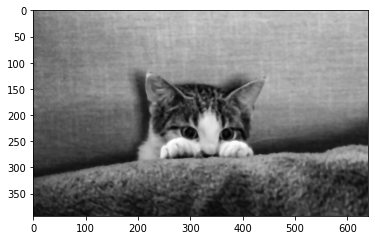

In [9]:
# aplicando a suavização da imagem com uma mascara 5x5
imagem_suavizada_bilateral = cv2.medianBlur(imagem, 5)

# mostrando imagem suavizada
plt.imshow(imagem_suavizada_bilateral, cmap="gray")

# Apoio

Universidade Tecnólogica Federal do Paraná - UTFPR

# Referências

- Documentação do OpenCV-Python-Tutoriais - Smoothing Images (https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_filtering/py_filtering.html)

- Lições da Data Carpentry - Blurring Images (https://datacarpentry.org/image-processing/06-blurring/index.html)

- Antonello, R. (2014). Introdução a Visão Computacional com Python e OpenCV. Engenharia de Controle e Automação do Instituto Federal Catarinense–IFC, campus Luzerna.

- A imagem gato.jpg foi obtida do site pixabay.com e possuí licença de domínio público.